In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
data=pd.read_excel('heart.xlsx')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
#EDA
#Checking rows and columns of the dataset
print(data.shape)
print(data.columns)

(918, 12)
Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


In [ ]:
#Statistical features of the dataeset
data.describe(include='all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


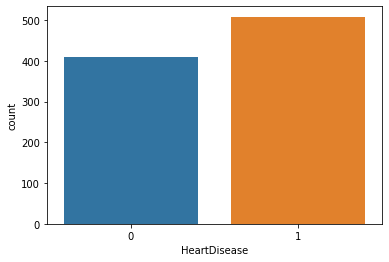

In [ ]:

#Checking the dataset type whether it is a balanced or imbalanced
sns.countplot(x=data['HeartDisease'],data=data)

In [ ]:

#Dividing the features  into numerical(continous and discrete) and categorical features
numerical_features=[features for features in data.columns if data[features].dtype!='O' and features!='HeartDisease']

In [ ]:
print(len(numerical_features))
numerical_features

6


['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

In [ ]:

categorical_features=[features for features in data.columns if data[features].dtype=='O' and features!='HeartDisease']

In [ ]:

print(len(categorical_features))
categorical_features

5


['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [ ]:
continous_features=[features for features in numerical_features if data[features].nunique()>=25]

In [ ]:
continous_features

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [ ]:
discrete_features=[features for features in numerical_features if data[features].nunique()<=25]

In [ ]:
discrete_features

['FastingBS']

Text(0.5, 1.0, 'Missing values per feature')

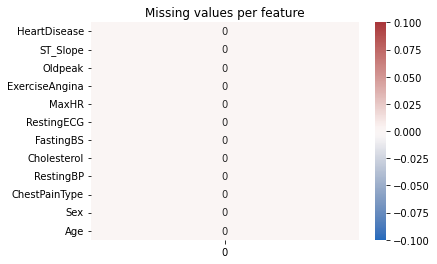

In [ ]:
#Checking null values in the dataset
null_val=data.isna().sum().sort_values(ascending=False).to_frame()
sns.heatmap(null_val,annot=True,fmt='d',cmap='vlag')
plt.title('Missing values per feature')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


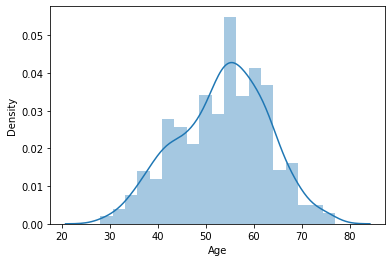

In [ ]:
#Univariate analysis
sns.distplot(data['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


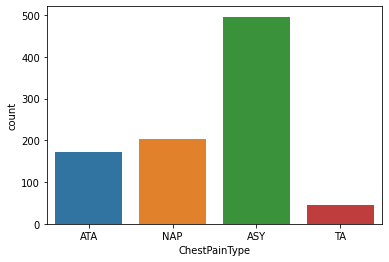

In [ ]:
sns.countplot(data['ChestPainType'])

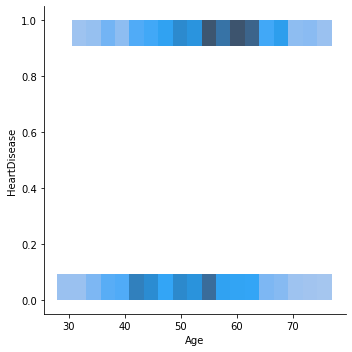

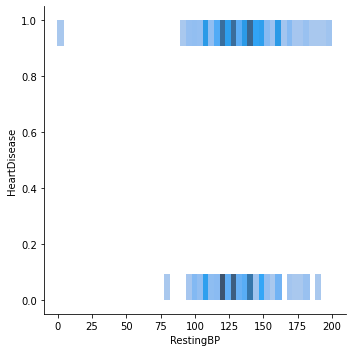

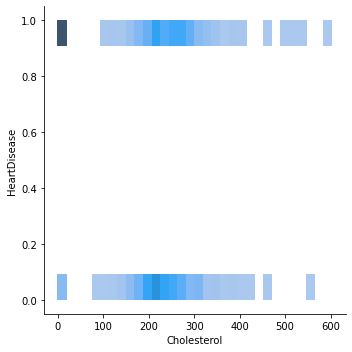

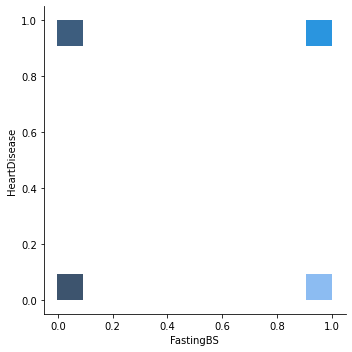

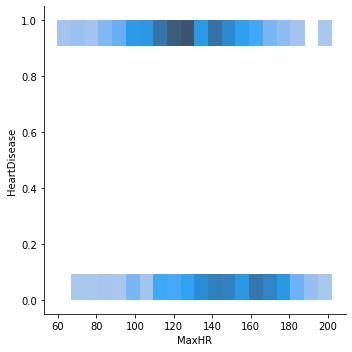

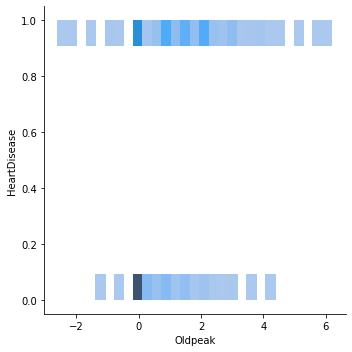

In [ ]:
#Bivariate analysis
for i in numerical_features:
  df=data.copy ()
  sns.displot(x=df[i],y=df['HeartDisease'])
  plt.xlabel(i)
  plt.ylabel('HeartDisease')
  plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


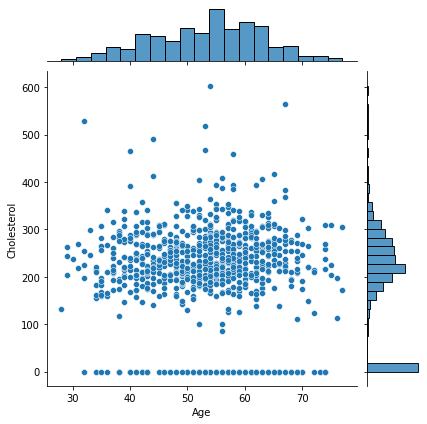

In [ ]:
sns.jointplot(data['Age'],data['Cholesterol'],kind='scatter')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


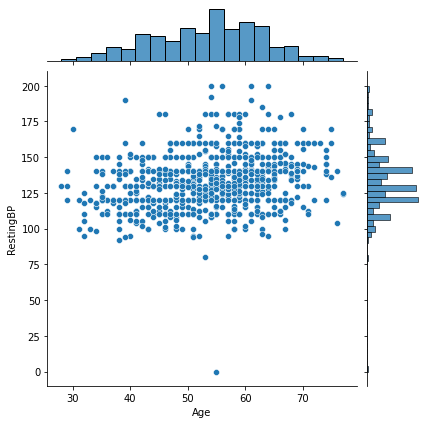

In [ ]:
sns.jointplot(data['Age'],data['RestingBP'],kind='scatter')

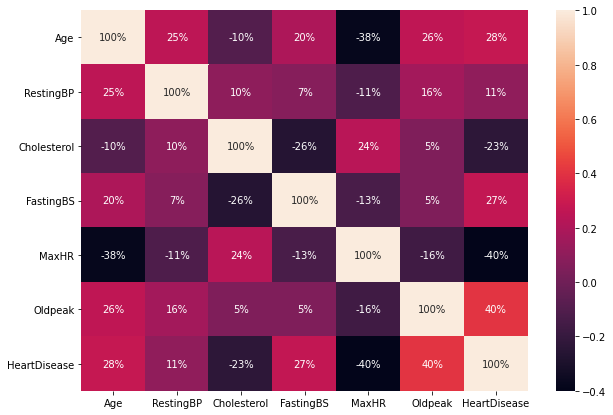

In [ ]:
#Multivariate analysis
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True,fmt='.0%')

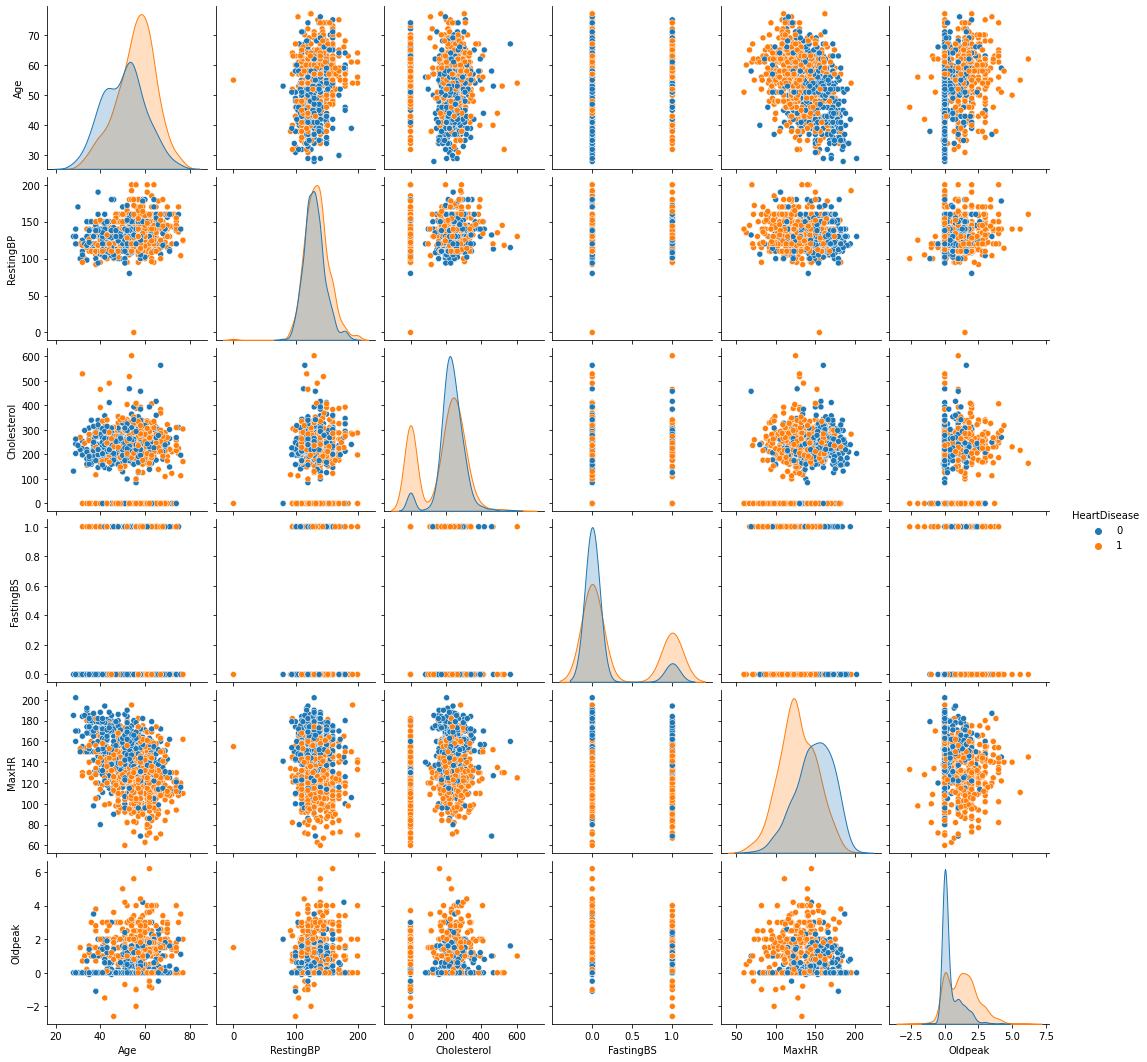

In [ ]:
sns.pairplot(data,hue='HeartDisease')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


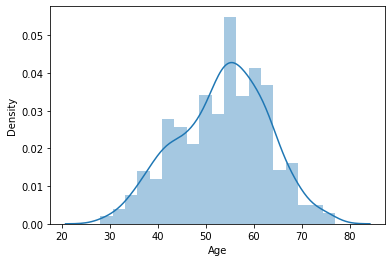

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


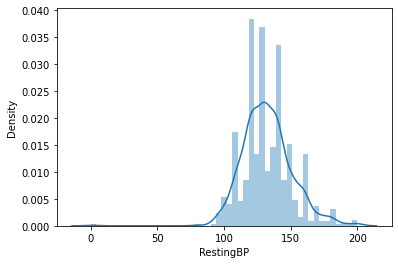

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


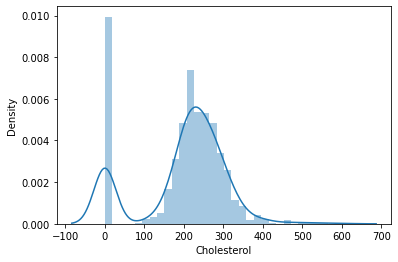

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


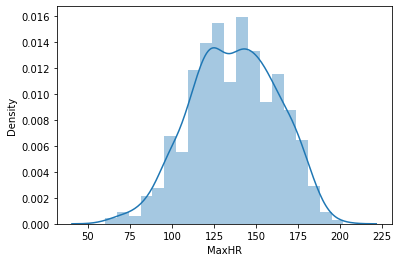

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


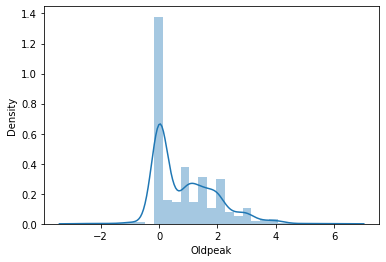

In [ ]:
#Checking the distribution of continous variables
for i in continous_features:
  df=data.copy ()
  sns.distplot(df[i])
  plt.xlabel(i)
  plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


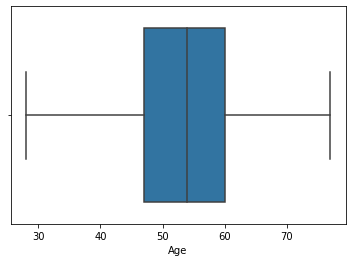

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


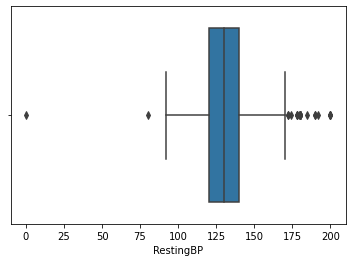

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


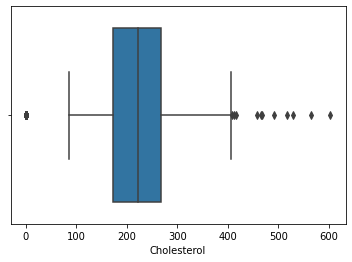

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


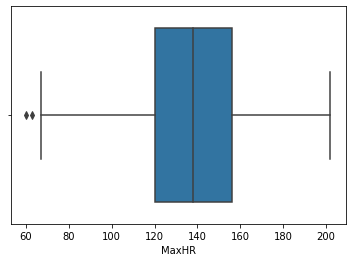

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


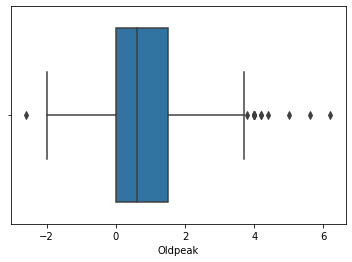

In [ ]:
#Checking the outliers in the continous variables
for i in continous_features:
  df=data.copy ()
  sns.boxplot(df[i])
  plt.xlabel(i)
  plt.show()

In [ ]:
#Feature engineering
#We do not have null values in the dataset
#We have very less no of outliers in the dataset
#Encoding the categorical features
categorical_features

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [ ]:
for i in categorical_features:
  print(i,' has ',data[i].nunique(),' of categories')

Sex  has  2  of categories
ChestPainType  has  4  of categories
RestingECG  has  3  of categories
ExerciseAngina  has  2  of categories
ST_Slope  has  3  of categories


In [ ]:
'''#We can use one-hot encoding
df=pd.get_dummies(columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'],data=data,drop_first=True)'''
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
data['Sex']=le.fit_transform(data['Sex'])

In [ ]:
data['ChestPainType']=le.fit_transform(data['ChestPainType'])
data['RestingECG']=le.fit_transform(data['RestingECG'])
data['ExerciseAngina']=le.fit_transform(data['ExerciseAngina'])
data['ST_Slope']=le.fit_transform(data['ST_Slope'])

In [ ]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [ ]:
data.shape

(918, 12)

In [ ]:
df=data.copy()

In [ ]:
z=np.abs(stats.zscore(df))
print(z)

[[1.4331398  0.51595242 0.22903206 ... 0.83243239 1.05211381 1.11311472]
 [0.47848359 1.93816322 1.27505906 ... 0.10566353 0.59607813 0.89837999]
 [1.75135854 0.51595242 0.22903206 ... 0.83243239 1.05211381 1.11311472]
 ...
 [0.37009972 0.51595242 0.81699495 ... 0.29328271 0.59607813 0.89837999]
 [0.37009972 1.93816322 0.22903206 ... 0.83243239 0.59607813 0.89837999]
 [1.64528563 0.51595242 1.27505906 ... 0.83243239 1.05211381 1.11311472]]


In [ ]:
threshold = 3
print(np.where(z > 3))

(array([ 76, 109, 149, 166, 241, 324, 365, 390, 399, 449, 592, 616, 702,
       732, 759, 771, 791, 850, 900]), array([4, 3, 4, 9, 3, 9, 3, 7, 3, 3, 3, 4, 9, 3, 3, 9, 9, 9, 9]))


In [ ]:
df_o = data[(z < 3).all(axis=1)]

In [ ]:
df_o.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [ ]:
df_o.shape

(899, 12)

In [ ]:
#Lets split the data set
X=df_o.drop(labels=['HeartDisease'],axis=1)
y=df_o[['HeartDisease']]

In [ ]:
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2


In [ ]:
y.head()

,HeartDisease
0,0
1,1
2,0
3,1
4,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
#Standardization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
#Random forest algorithm
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier(n_estimators=50)

In [ ]:
rf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred=rf.predict(X_test)
X_pred=rf.score(X_test,y_test)
print('Training accuracy=',X_pred)

Training accuracy= 0.8611111111111112


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,plot_confusion_matrix

In [ ]:
y_test.shape,y_pred.shape

((180, 1), (180,))

In [ ]:
accuracy_score(y_test,y_pred)

0.8611111111111112

In [ ]:
#Naive bayes
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

In [ ]:
nb.fit(X_train,y_train)
y_pred_nb=nb.predict(X_test)
x_pred_nb=nb.score(X_test,y_test)
print(x_pred_nb)

0.8333333333333334


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
accuracy_score(y_test,y_pred_nb)

0.8333333333333334

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [ ]:
y_pred_knn = knn.predict(X_test)
x_pred_knn=knn.score(X_test,y_test)
print('Training accuracy',x_pred_knn)

Training accuracy 0.8888888888888888


In [ ]:
accuracy_score(y_test,y_pred_knn)

0.8888888888888888

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
y_pred_gb = gbc.predict(X_test)
x_pred_gb=gbc.score(X_test,y_test)
print('Training accuracy',x_pred_gb)

Training accuracy 0.8722222222222222


In [ ]:
accuracy_score(y_test,y_pred_gb)

0.8722222222222222

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_log= log.predict(X_test)
x_pred_log=log.score(X_test,y_test)
print('Training accuracy',x_pred_log)

Training accuracy 0.8555555555555555
